<a href="https://colab.research.google.com/github/therealfortune/tensorflow-fortune/blob/master/rps(ROCK_PAPER_SCISSORS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DOWNLOADING RPS(ROCK PAPER SCISSORS) TRAINING SET

In [1]:
!gdown --id 1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV

Downloading...
From: https://drive.google.com/uc?id=1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV
To: /content/rps.zip
100% 201M/201M [00:01<00:00, 110MB/s]


DOWNLOADING RPS VALIDATION SET

In [2]:
!gdown --id 1RaodrRK1K03J_dGiLu8raeUynwmIbUaM

Downloading...
From: https://drive.google.com/uc?id=1RaodrRK1K03J_dGiLu8raeUynwmIbUaM
To: /content/rps-test-set.zip
100% 29.5M/29.5M [00:00<00:00, 50.9MB/s]


In [3]:
import os
import zipfile

local_zip = "/content/rps.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

local_zip = "/content/rps-test-set.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
base_dir = "/content/rps"
rock_dir = os.path.join(base_dir, "rock")
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [5]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock07-k03-109.png', 'rock06ck02-119.png', 'rock06ck02-088.png', 'rock01-034.png', 'rock02-069.png', 'rock04-070.png', 'rock03-055.png', 'rock01-039.png', 'rock01-098.png', 'rock02-093.png']
['paper06-074.png', 'paper07-035.png', 'paper04-003.png', 'paper06-046.png', 'paper04-012.png', 'paper01-027.png', 'paper03-011.png', 'paper01-019.png', 'paper02-114.png', 'paper06-055.png']
['scissors04-044.png', 'testscissors01-065.png', 'testscissors02-039.png', 'scissors04-013.png', 'scissors02-095.png', 'scissors03-116.png', 'scissors03-106.png', 'scissors03-098.png', 'scissors04-101.png', 'scissors02-060.png']


In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

CREATING OUR NEURAL NETWORKS

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
train_dir = "/content/rps"
validation_dir = "/content/rps-test-set"

train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    class_mode = 'categorical',
    batch_size = 10
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    class_mode = 'categorical',
    batch_size=10
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


COMPILING THE MODEL

In [10]:
model.compile(
    optimizer='rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 20,
    epochs = 25,
    validation_data = validation_generator,
    verbose=1,
    validation_steps = 3
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/25
20/20 [==============================] - 2s 117ms/step - loss: 0.4540 - accuracy: 0.8250 - val_loss: 0.1570 - val_accuracy: 0.9333
Epoch 2/25
20/20 [==============================] - 2s 114ms/step - loss: 0.3024 - accuracy: 0.8700 - val_loss: 0.2549 - val_accuracy: 0.9000
Epoch 3/25
20/20 [==============================] - 2s 115ms/step - loss: 0.3956 - accuracy: 0.8250 - val_loss: 0.0806 - val_accuracy: 0.9667
Epoch 4/25
20/20 [==============================] - 2s 114ms/step - loss: 0.2499 - accuracy: 0.8900 - val_loss: 0.0774 - val_accuracy: 0.9667
Epoch 5/25
20/20 [==============================] - 2s 114ms/step - loss: 0.2791 - accuracy: 0.9150 - val_loss: 0.2111 - val_accuracy: 0.9667
Epoch 6/25
20/20 [==============================] - 2s 121ms/step - loss: 0.3157 - accuracy: 0.9000 - val_loss: 0.1607 - val_accuracy: 0.9333
Epoch 7/25
20/20 [==============================] - 2s 114ms/step - loss: 0.2722 - accuracy: 0.9050 - val_loss: 0.1709 - val_accuracy: 0.9000
Epoch 

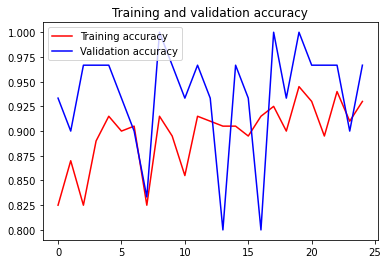

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving rock-hires1.png to rock-hires1.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper-hires1.png to paper-hires1.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving scissors-hires1.png to scissors-hires1.png
rock-hires1.png
[[0. 1. 0.]]
scissors5.png
[[0. 0. 1.]]
scissors6.png
[[0. 0. 1.]]
scissors7.png
[[0. 0. 1.]]
paper4.png
[[1. 0. 0.]]
paper5.png
[[1. 0. 0.]]
paper6.png
[[1. 0. 0.]]
paper-hires1.png
[[1. 0. 0.]]
rock1.png
[[0. 1. 0.]]
rock2.png
[[0. 1. 0.]]
rock3.png
[[0. 1. 0.]]
scissors-hires1.png
[[0. 0. 1.]]
